
Pakai Chat GPT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Sequential
from keras.layers import Dense

import time
import matplotlib.pyplot as plt

In [4]:
# DATA
df_brfss = pd.read_csv('/Users/macbook/Library/CloudStorage/GoogleDrive-nurrachmandzakiyullah@gmail.com/My Drive/23. Colab Notebooks/1. AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/2. MLC Model/4.Final_dataset_Diabetes_Complication.csv')
x = df_brfss.iloc[:, :26].values
X = preprocessing.normalize(x)
y = df_brfss.iloc[:, 26:].values-1

In [5]:
X

array([[0.21879749, 0.0729325 , 0.0729325 , ..., 0.0729325 , 0.21879749,
        0.0729325 ],
       [0.35007002, 0.21004201, 0.070014  , ..., 0.070014  , 0.14002801,
        0.14002801],
       [0.36214298, 0.09053575, 0.09053575, ..., 0.18107149, 0.27160724,
        0.09053575],
       ...,
       [0.07980869, 0.15961738, 0.07980869, ..., 0.07980869, 0.23942607,
        0.07980869],
       [0.26211122, 0.08737041, 0.17474081, ..., 0.08737041, 0.26211122,
        0.17474081],
       [0.08192319, 0.08192319, 0.08192319, ..., 0.08192319, 0.24576958,
        0.16384638]])

In [6]:
y

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [7]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Algorithm Adaptation
class MLDNN:
    def __init__(self, hidden_units=(100, 100)):
        self.hidden_units = hidden_units
        self.label_binarizer = MultiLabelBinarizer()

    def fit(self, X, y, epochs=50, batch_size=32, validation_split=0.2):
        self.label_binarizer.fit(y)
        y_encoded = self.label_binarizer.transform(y)
        self.model = Sequential()
        self.model.add(Dense(self.hidden_units[0], input_dim=X.shape[1], activation='relu'))
        for units in self.hidden_units[1:]:
            self.model.add(Dense(units, activation='relu'))
        self.model.add(Dense(y_encoded.shape[1], activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.fit(X, y_encoded, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X):
        y_pred_prob = self.model.predict(X)
        y_pred = (y_pred_prob > 0.5).astype(int)
        return self.label_binarizer.inverse_transform(y_pred)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        return accuracy

In [9]:
# Create an instance of the MLNN class
mlnn = MLDNN(hidden_units=(100, 100))  # Customize the number of hidden units as needed

In [10]:
# Algorithm Adaptation
model = MLDNN()

In [11]:
# Get the parameter values
#params = model.get_params()

# Print the parameter values
#print(params)

In [ ]:
# Train with time
start = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start

In [ ]:
# 10-fold cross-validation
start = time.time()
predicted_labels = cross_val_predict(model, X, y, cv=10)
cross_val_time = time.time() - start

In [ ]:
# Testing with time
start = time.time()
predictions = model.predict(X_test)
testing_time = time.time() - start

In [ ]:
# Convert sparse matrix to dense array
predictions_dense = predictions.toarray()

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_dense)
precision = precision_score(y_test, predictions_dense, average='micro')
recall = recall_score(y_test, predictions_dense, average='micro')
f1 = f1_score(y_test, predictions_dense, average='micro')
hamming_loss_score = hamming_loss(y_test, predictions_dense)
jaccard = jaccard_score(y_test, predictions_dense, average='micro')
auc_roc = roc_auc_score(y_test, predictions_dense)

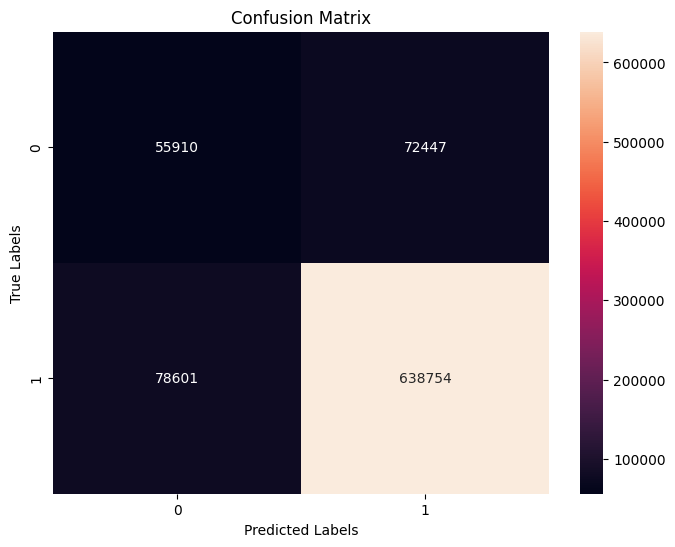

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test.ravel(), predictions_dense.ravel())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

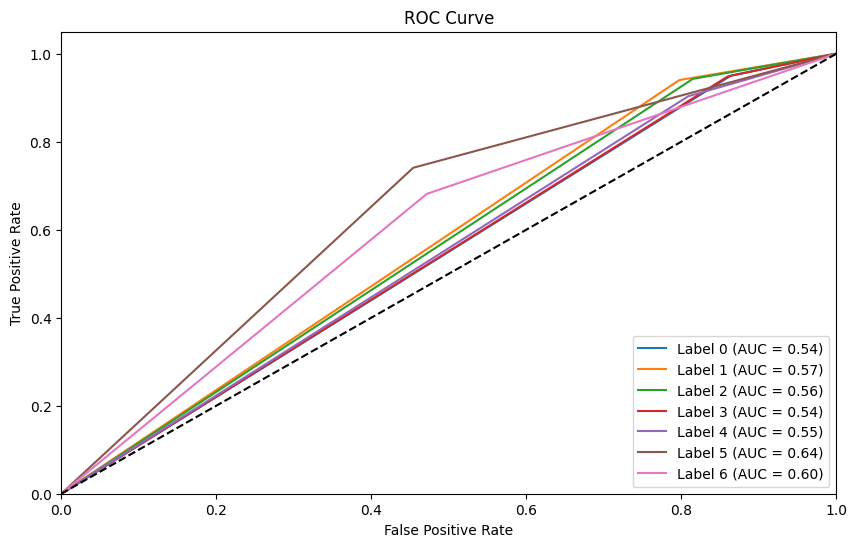

In [ ]:
from scipy.sparse import issparse

plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
for i in range(y.shape[1]):
    y_test_label = np.squeeze(y_test[:, i].toarray()) if issparse(y_test[:, i]) else np.squeeze(y_test[:, i])
    y_pred_label = np.squeeze(predictions[:, i].toarray()) if issparse(predictions[:, i]) else np.squeeze(predictions[:, i])
    fpr, tpr, _ = roc_curve(y_test_label, y_pred_label)
    roc_auc_per_label[i] = roc_auc_score(y_test_label, y_pred_label)
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))

# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Print results
print('Training Time:', round(training_time, 2), 'seconds')
print('Cross-validated Testing Time:', round(cross_val_time, 2), 'seconds')
print('Testing Time on Specific Test Set:', round(testing_time, 2), 'seconds')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Hamming Loss:', hamming_loss_score)
print('Jaccard Score:', jaccard)
print('AUC-ROC:', auc_roc)


Training Time: 157.05 seconds
Cross-validated Testing Time: 1345.78 seconds
Testing Time on Specific Test Set: 0.39 seconds
Accuracy: 0.29846212422195734
Precision: 0.8981342827133257
Recall: 0.8904294247617985
F1 Score: 0.8942652580647872
Hamming Loss: 0.1786045367690183
Jaccard Score: 0.8087520669737478
AUC-ROC: 0.5739848918586794


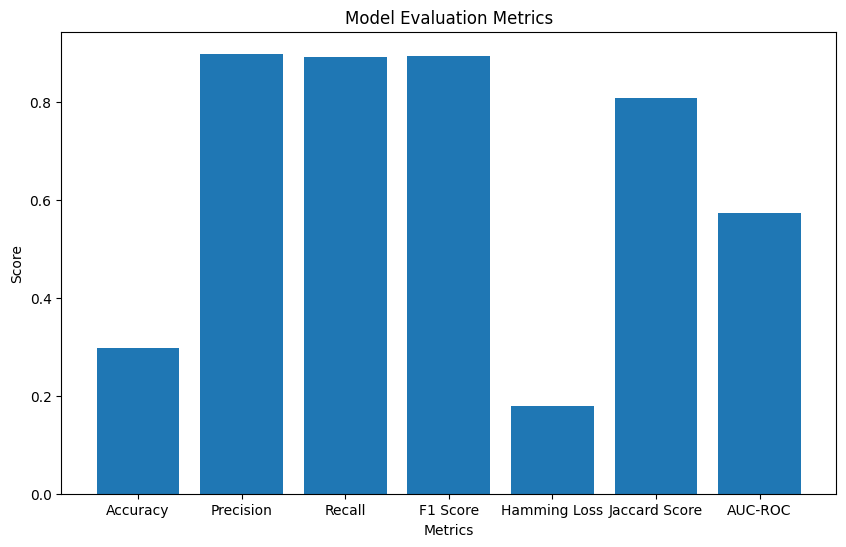

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Hamming Loss', 'Jaccard Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, hamming_loss_score, jaccard, auc_roc]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()


In [ ]:
def _check_targets(y_true, y_pred):
    if y_true.shape != y_pred.shape:
        raise ValueError('the shape of y_true is inconsistent with the shape of y_pred')

def _intersection(a, b):
    """
    a.shape = (m, )
    b.shape = (m, )
    """
    count = 0
    for i_a, i_b in zip(a, b):
        if i_a == 1 and i_b == 1:
            count += 1
    return count

def _convergence(a, b):
    count = 0
    for i_a, i_b in zip(a, b):
        if i_a == 1 or i_b == 1:
            count += 1
    return count

def _sym_difference(a, b):
    count = 0
    for i_a, i_b in zip(a, b):
        if i_a != i_b:
            count += 1
    return count

def subset_acc(y_true, y_pred):
    _check_targets(y_true, y_pred)
    sample_num, label_count = y_true.shape
    acc_count = 0
    for i in range(sample_num):
        if (y_true[i] == y_pred[i]).sum() == label_count:
            acc_count += 1
    return acc_count / sample_num

def hamming_loss(y_true, y_pred):
    _check_targets(y_true, y_pred)
    sample_num, label_count = y_true.shape
    count = 0
    for i in range(sample_num):
        count += _sym_difference(y_true[i], y_pred[i])
    return count / (sample_num * label_count)

def accuracy(y_true, y_pred):
    _check_targets(y_true, y_pred)
    sample_num, label_count = y_true.shape
    count = 0.
    for i in range(sample_num):
        count += _intersection(y_true[i], y_pred[i]) / _convergence(y_true[i], y_pred[i])
    return count / sample_num

def precision(y_true, y_pred):
    _check_targets(y_true, y_pred)
    sample_num, label_count = y_true.shape
    count = 0.
    for i in range(sample_num):
        if y_pred[i].sum() == 0:
            pass
        else:
            count += _intersection(y_true[i], y_pred[i]) / y_pred[i].sum()
    return count / sample_num

def recall(y_true, y_pred):
    _check_targets(y_true, y_pred)
    sample_num, label_count = y_true.shape
    count = 0.
    for i in range(sample_num):
        if y_true[i].sum() == 0:
            pass
        else:
            count += _intersection(y_true[i], y_pred[i]) / y_true[i].sum()
    return count / sample_num

def F_beta(y_true, y_pred, beta=1):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return (1+beta**2) * p * r / (beta**2 * p + r)

if __name__ == '__main__':
    from sklearn.datasets import make_multilabel_classification
    from sklearn.model_selection import train_test_split
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import SVC

    X, y = make_multilabel_classification(n_samples=700,
                                      n_features = 80,
                                      n_classes=5, 
                                      n_labels=2,
                                      allow_unlabeled=False,
                                      random_state=1)                                  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X_train, y_train)
    predictions = classif.predict(X_test)
    
    print('The subset_acc Result is %f' % subset_acc(y_test, predictions))
    print('The hamming_loss Result is %f' % hamming_loss(y_test, predictions))
    print('The accuracy Result is %f' % accuracy(y_test, predictions))
    print('The precision Result is %f' % precision(y_test, predictions))
    print('The recall Result is %f' % recall(y_test, predictions))
    print('The F_beta Result is %f' % F_beta(y_test, predictions))